### DSC 789-001 - Summer 2025: Strategic Capstone Projects
- Professor: Zahra Sedighi-Maman

##### GROUP-1 Members:
- Hemanth Meka
- Riya Shah
- Mamatha Jala
- Sharanya Dulam

#### PROJECT: BANK MARKETING

- Phase: Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold


In [2]:
# Loading the dataset
bank = pd.read_csv("Bank Marketing-separeted columns.csv")

In [3]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
# Removing Redudant variables.
data = bank.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


#### Checking for missing values in dataset

In [5]:
#  Displays the non-null valuea and data types of colums
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


In [6]:
data.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [7]:
# Separating Categorical and Numerical Data from the Dataset
categoricalData = data.select_dtypes(include=['object'])
numericData = data.select_dtypes(include=['int64', 'float64'])


In [8]:
categoricalData

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [9]:
numericData.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [10]:
numericData

,age,duration,campaign,pdays,previous
0,56,261,1,999,0
1,57,149,1,999,0
2,37,226,1,999,0
3,40,151,1,999,0
4,56,307,1,999,0
...,...,...,...,...,...
41183,73,334,1,999,0
41184,46,383,1,999,0
41185,56,189,2,999,0
41186,44,442,1,999,0


#### Identifying and handling outliers

In [11]:
# Numeric columns
columns = ['age', 'duration']

# Dictionary to store number of outliers
outlier_counts = {}

for col in columns:
    Q1 = numericData[col].quantile(0.25)
    Q3 = numericData[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = numericData[(numericData[col] < lower_bound) | (numericData[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Display the number of outliers per column
print(outlier_counts)

{'age': 469, 'duration': 2963}


In [12]:
# Handling Outliers and Noise
# Binning Age with the given ranges
bins_age = [0, 18, 25, 35, 50, 60, 100]
labels_age = ['<18', '18-24', '25-34', '35-50', '50-60', '60+']
numericData['age_bin'] = pd.cut(data['age'], bins=bins_age, labels=labels_age, right=False).astype('object')

# Binning Call Duration
bins_duration = [0, 60, 120, 300, 600, 1200, data['duration'].max()]
labels_duration = ['0 min', '1-2 min', '3-5 min', '6-10 min', '11-20 min', '21+ min']
numericData['duration_bin'] = pd.cut(data['duration'], bins=bins_duration, labels=labels_duration, right=False).astype('object')

# Dropping the age and duration
numeric_Data = numericData.drop(['age', 'duration'], axis=1)

In [13]:
numeric_Data

,campaign,pdays,previous,age_bin,duration_bin
0,1,999,0,50-60,3-5 min
1,1,999,0,50-60,3-5 min
2,1,999,0,35-50,3-5 min
3,1,999,0,35-50,3-5 min
4,1,999,0,50-60,6-10 min
...,...,...,...,...,...
41183,1,999,0,60+,6-10 min
41184,1,999,0,35-50,6-10 min
41185,2,999,0,50-60,3-5 min
41186,1,999,0,35-50,6-10 min


In [14]:
data_1 =  numeric_Data.join(categoricalData)

In [15]:
data_1

,campaign,pdays,previous,age_bin,duration_bin,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,1,999,0,50-60,3-5 min,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,1,999,0,50-60,3-5 min,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,1,999,0,35-50,3-5 min,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,1,999,0,35-50,3-5 min,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,1,999,0,50-60,6-10 min,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,999,0,60+,6-10 min,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,1,999,0,35-50,6-10 min,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,2,999,0,50-60,3-5 min,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,1,999,0,35-50,6-10 min,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [16]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   campaign      41188 non-null  int64 
 1   pdays         41188 non-null  int64 
 2   previous      41188 non-null  int64 
 3   age_bin       41188 non-null  object
 4   duration_bin  41187 non-null  object
 5   job           41188 non-null  object
 6   marital       41188 non-null  object
 7   education     41188 non-null  object
 8   default       41188 non-null  object
 9   housing       41188 non-null  object
 10  loan          41188 non-null  object
 11  contact       41188 non-null  object
 12  month         41188 non-null  object
 13  day_of_week   41188 non-null  object
 14  poutcome      41188 non-null  object
 15  y             41188 non-null  object
dtypes: int64(3), object(13)
memory usage: 5.0+ MB


#### Encoding the categorical columns and target variable


In [17]:
# Extract categorical column names (excluding 'y')
categorical_cols = data_1.select_dtypes(include=['object']).columns.drop('y')

# One-hot encode categorical columns
categoriesEncoded = pd.get_dummies(data_1[categorical_cols], drop_first=False)

# Extract numerical columns (excluding categorical columns and 'y')
numerical_cols = data_1.drop(columns=list(categorical_cols) + ['y'])

# Combine numerical and encoded categorical columns
features = pd.concat([numerical_cols, categoriesEncoded], axis=1)

# Now encode the target variable 'y' and add it back
target = data_1['y'].replace({'yes': 1, 'no': 0})

# Combine features and target
final_data = pd.concat([features, target], axis=1)

final_data

,campaign,pdays,previous,age_bin_18-24,age_bin_25-34,age_bin_35-50,age_bin_50-60,age_bin_60+,age_bin_<18,duration_bin_0 min,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,1,999,0,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,0
1,1,999,0,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,0
2,1,999,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,0
3,1,999,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,0
4,1,999,0,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,999,0,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,1
41184,1,999,0,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
41185,2,999,0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
41186,1,999,0,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,1


#### Checking for the Near Zero Variance columns

In [18]:
feature_data = final_data.select_dtypes(include=[np.number, 'bool'])
# Variance check for all columns
selector = VarianceThreshold(threshold=0.01)
selector.fit(feature_data)

# Gets and Print the list of low variance columns
low_variance_cols = feature_data.columns[~selector.get_support()]
print(low_variance_cols.tolist())

# Dropping columns with zero variance
final_data = final_data.drop(columns=low_variance_cols)

['age_bin_<18', 'job_unknown', 'marital_unknown', 'education_illiterate', 'default_yes', 'month_dec']


In [19]:
bank_data = final_data

In [20]:
bank_data

,campaign,pdays,previous,age_bin_18-24,age_bin_25-34,age_bin_35-50,age_bin_50-60,age_bin_60+,duration_bin_0 min,duration_bin_1-2 min,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,1,999,0,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,0
1,1,999,0,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,0
2,1,999,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,0
3,1,999,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,0
4,1,999,0,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,999,0,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,1
41184,1,999,0,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
41185,2,999,0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
41186,1,999,0,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,1


In [21]:
bank_data.to_csv('bank_data.csv', index=False)

In [21]:
top_features = [
    'duration_bin_1-2 min',
    'duration_bin_3-5 min',
    'duration_bin_11-20 min',
    'duration_bin_0 min',
    'contact_telephone',
    'month_may',
    'campaign',
    'pdays',
    'month_jul',
    'month_aug'
]

In [22]:
# Binary features (0/1)
binary_features = [
    'duration_bin_1-2 min',
    'duration_bin_3-5 min',
    'duration_bin_11-20 min',
    'duration_bin_0 min',
    'contact_telephone',
    'month_may',
    'month_jul',
    'month_aug'
]

# Continuous features
numeric_features = ['campaign', 'pdays']

# Summary for binary features
print(" Binary Features Summary Statistics ")
print(bank_data[binary_features].describe().T)

# Summary for numeric features
print("\n Continuous Feature Summary Statistics ")
print(bank_data[numeric_features].describe().T)

 Binary Features Summary Statistics 
                        count unique    top   freq
duration_bin_1-2 min    41188      2  False  32574
duration_bin_3-5 min    41188      2  False  24045
duration_bin_11-20 min  41188      2  False  38225
duration_bin_0 min      41188      2  False  37007
contact_telephone       41188      2  False  26144
month_may               41188      2  False  27419
month_jul               41188      2  False  34014
month_aug               41188      2  False  35010

 Continuous Feature Summary Statistics 
            count        mean         std  min    25%    50%    75%    max
campaign  41188.0    2.567593    2.770014  1.0    1.0    2.0    3.0   56.0
pdays     41188.0  962.475454  186.910907  0.0  999.0  999.0  999.0  999.0


In [23]:
import pandas as pd

# Define your top 10 features
top_features = [
    'duration_bin_1-2 min',
    'duration_bin_3-5 min',
    'duration_bin_11-20 min',
    'duration_bin_0 min',
    'contact_telephone',
    'month_may',
    'campaign',
    'pdays',
    'month_jul',
    'month_aug'
]

# Function to calculate % Yes and % No for feature == 1
def feature_yes_no_percent(data, feature_col, target_col='y'):
    subset = data[data[feature_col] == 1]
    total = len(subset)
    if total == 0:
        return {'Feature': feature_col, '% No': 0, '% Yes': 0}
    yes_pct = (subset[target_col] == 1).mean() * 100
    no_pct = 100 - yes_pct
    return {'Feature': feature_col, '% No': round(no_pct, 2), '% Yes': round(yes_pct, 2)}

# Run the summary for the 10 features
summary = [feature_yes_no_percent(bank_data, f) for f in top_features]

# Convert to DataFrame and display
summary_df = pd.DataFrame(summary)
print(summary_df)

                  Feature   % No  % Yes
0    duration_bin_1-2 min  98.11   1.89
1    duration_bin_3-5 min  92.15   7.85
2  duration_bin_11-20 min  53.80  46.20
3      duration_bin_0 min  99.98   0.02
4       contact_telephone  94.77   5.23
5               month_may  93.57   6.43
6                campaign  86.96  13.04
7                   pdays  69.23  30.77
8               month_jul  90.95   9.05
9               month_aug  89.40  10.60


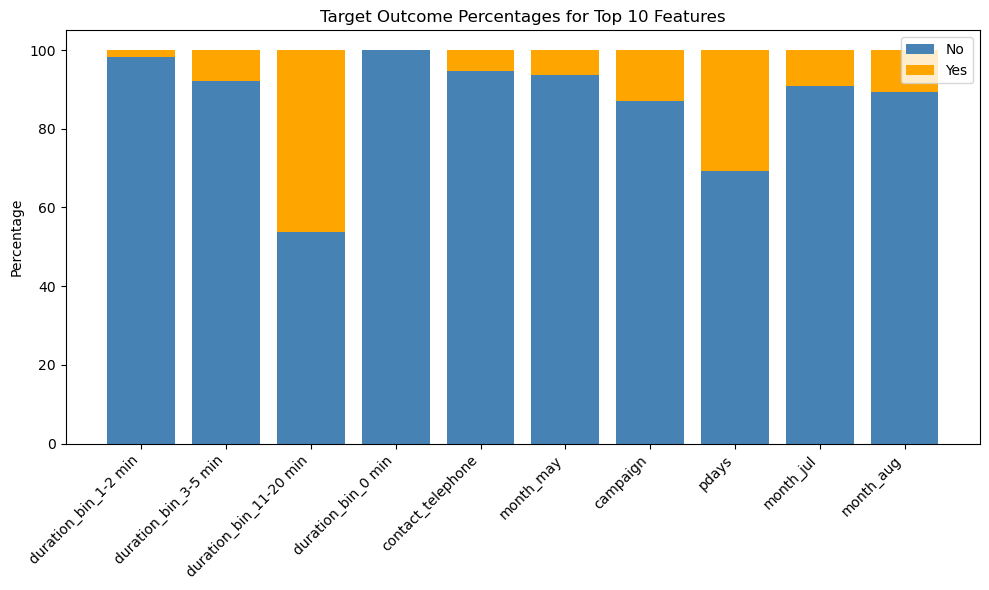

In [24]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Feature labels
features = summary_df['Feature']

# Bar positions
bar_positions = range(len(features))

# Stacked bars: No (bottom), Yes (on top)
plt.bar(bar_positions, summary_df['% No'], color='steelblue', label='No')
plt.bar(bar_positions, summary_df['% Yes'], bottom=summary_df['% No'], color='orange', label='Yes')

# Feature labels on x-axis
plt.xticks(bar_positions, features, rotation=45, ha='right')

# Axis labels and title
plt.ylabel('Percentage')
plt.title('Target Outcome Percentages for Top 10 Features')
plt.legend()

# Tight layout to avoid cutoff
plt.tight_layout()

# Show the plot
plt.show()

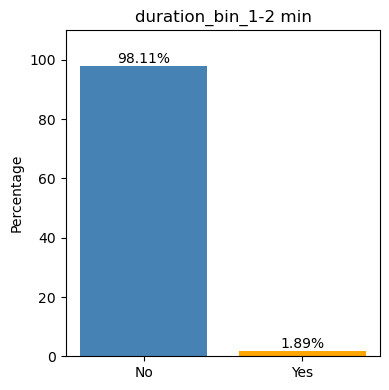

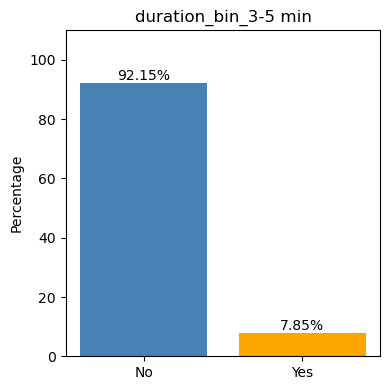

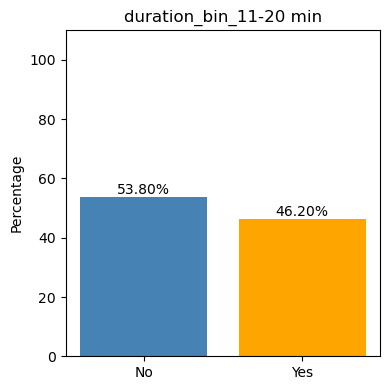

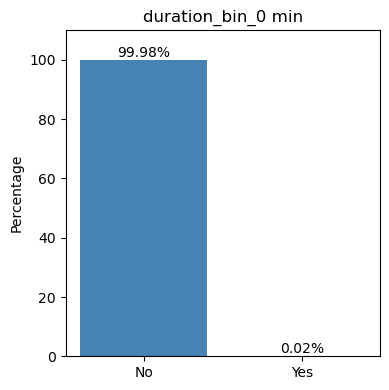

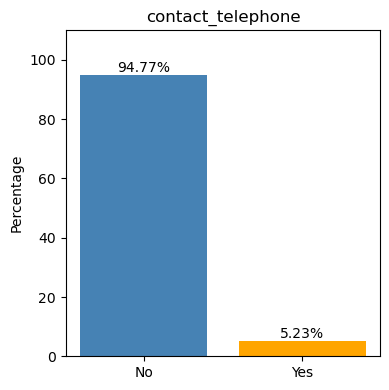

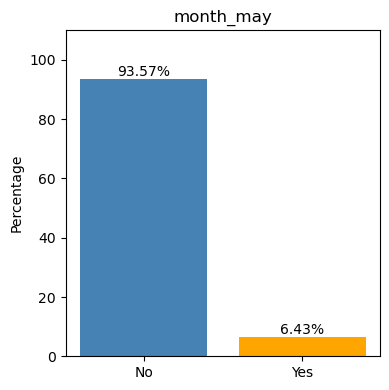

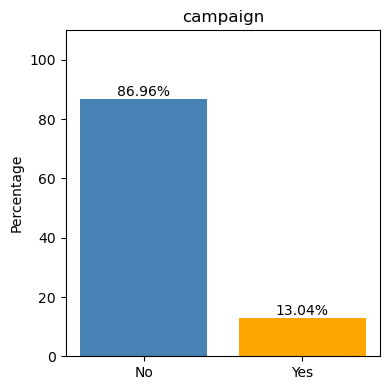

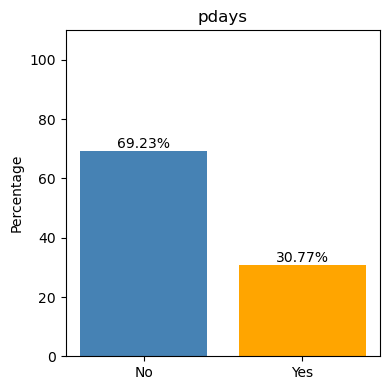

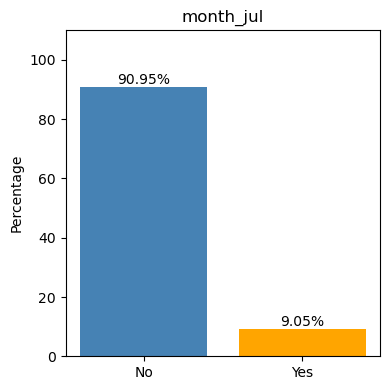

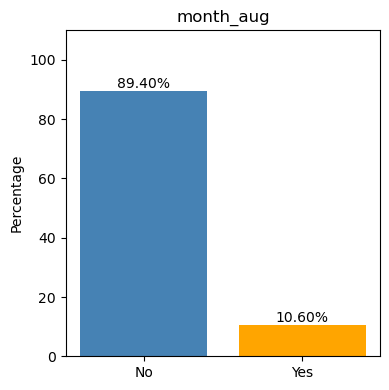

In [25]:
import matplotlib.pyplot as plt

# Loop through each row in the summary DataFrame
for _, row in summary_df.iterrows():
    feature = row['Feature']
    yes_pct = row['% Yes']
    no_pct = row['% No']
    
    # Create bar chart
    plt.figure(figsize=(4, 4))
    plt.bar(['No', 'Yes'], [no_pct, yes_pct], color=['steelblue', 'orange'])
    
    # Title and labels
    plt.title(f"{feature}")
    plt.ylabel("Percentage")
    plt.ylim(0, 110)
    
    # Show exact values on top of bars
    for i, val in enumerate([no_pct, yes_pct]):
        plt.text(i, val + 1, f"{val:.2f}%", ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [64]:
bank_data['campaign'].value_counts().sort_index()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
15       51
16       51
17       58
18       33
19       26
20       30
21       24
22       17
23       16
24       15
25        8
26        8
27       11
28        8
29       10
30        7
31        7
32        4
33        4
34        3
35        5
37        1
39        1
40        2
41        1
42        2
43        2
56        1
Name: count, dtype: int64

In [71]:
bank_data['pdays'].value_counts().sort_index()

pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: count, dtype: int64

#### Detailed feature vs target visualizations for continuous features from top ten

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is named 'bank_data'

# Binning 'campaign'
bank_data['campaign_bin'] = pd.cut(
    bank_data['campaign'],
    bins=[0, 1, 3, 6, 10, 999],
    labels=['1 call', '2-3 calls', '4-6 calls', '7-10 calls', '10+ calls'],
    include_lowest=True
)

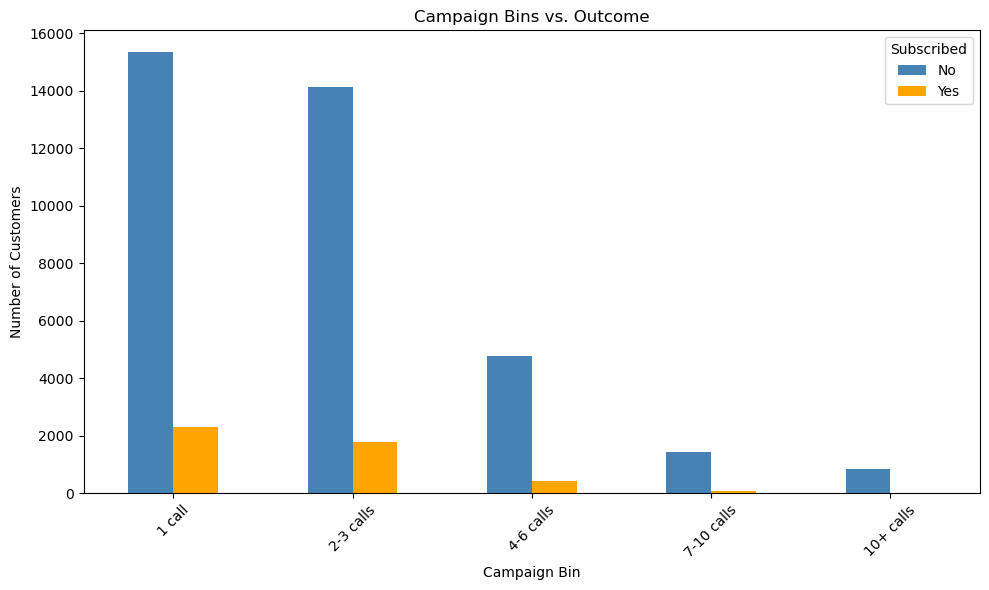

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by campaign_bin and y, then count
campaign_counts = bank_data.groupby(['campaign_bin', 'y']).size().unstack().fillna(0)

# Plotting
campaign_counts.plot(kind='bar', figsize=(10, 6), color=['steelblue', 'orange'])

# Add labels
plt.title('Campaign Bins vs. Outcome')
plt.xlabel('Campaign Bin')
plt.ylabel('Number of Customers')
plt.legend(['No', 'Yes'], title='Subscribed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
import numpy as np
import pandas as pd

# Step 1: Replace 999 with np.nan
bank_data['pdays_clean'] = bank_data['pdays'].replace(999, np.nan)

# Step 2: Ensure it's float dtype (not nullable Int64)
bank_data['pdays_clean'] = bank_data['pdays_clean'].astype(float)

# Step 3: Apply binning
pdays_bins = [-1, 0, 5, 15, 30, 100, 998]
pdays_labels = ['0 days', '1–5 days', '6–15 days', '16–30 days', '31–100 days', '101–998 days']

bank_data['pdays_bin'] = pd.cut(
    bank_data['pdays_clean'],
    bins=pdays_bins,
    labels=pdays_labels
)

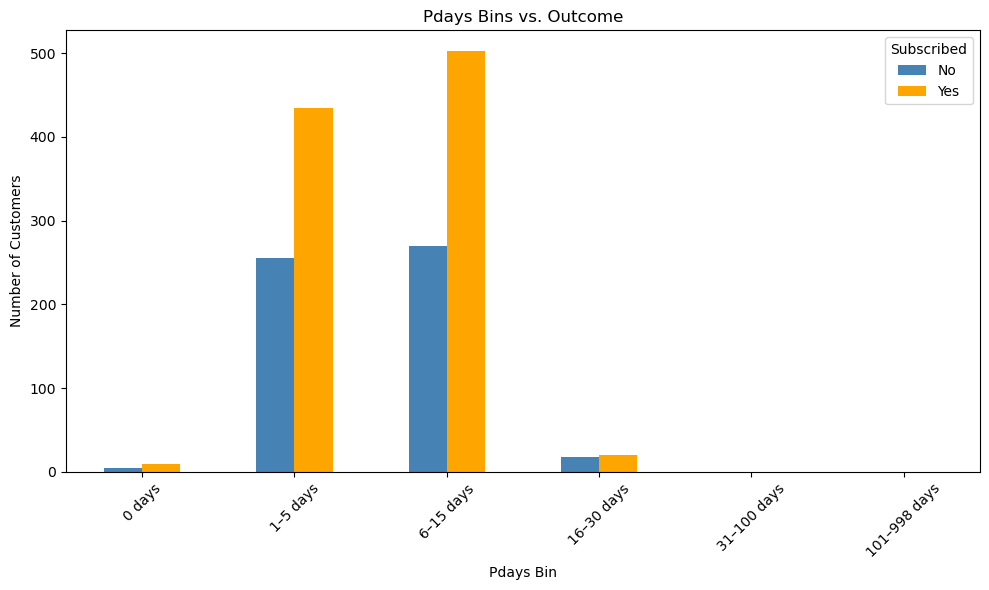

In [76]:
import matplotlib.pyplot as plt

# Drop rows with NaN in pdays_bin
pdays_filtered = bank_data.dropna(subset=['pdays_bin'])

# Group by bin and target variable
pdays_counts = pdays_filtered.groupby(['pdays_bin', 'y']).size().unstack().fillna(0)

# Plot bar chart
pdays_counts.plot(kind='bar', figsize=(10, 6), color=['steelblue', 'orange'])

plt.title('Pdays Bins vs. Outcome')
plt.xlabel('Pdays Bin')
plt.ylabel('Number of Customers')
plt.legend(['No', 'Yes'], title='Subscribed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Modeling 

#### Separate features and target

In [26]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']

#### Split into train and test sets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)

(28831, 62)
(12357, 62)


In [29]:
print("y_train class distribution:")
print(y_train.value_counts())

print("\ny_test class distribution:")
print(y_test.value_counts())

y_train class distribution:
y
0    25580
1     3251
Name: count, dtype: int64

y_test class distribution:
y
0    10968
1     1389
Name: count, dtype: int64


### Addressing class imbalance using SMOTE

In [30]:
pip install -U scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/8d/a1/d3a7628630a711e2ac0d1a482910da174b629f44e7dd8cfcd6924a4ef81a/scikit_learn-1.7.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.7.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [32]:
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
y
0    25580
1     3251
Name: count, dtype: int64

After SMOTE:
y
0    25580
1    25580
Name: count, dtype: int64


### Addressing class imbalance using ADASYN

In [33]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [34]:
print("Before ADASYN:")
print(y_train.value_counts())

print("\nAfter ADASYN:")
print(y_train_adasyn.value_counts())

Before ADASYN:
y
0    25580
1     3251
Name: count, dtype: int64

After ADASYN:
y
0    25580
1    25447
Name: count, dtype: int64


### Extracting Important Features Using Random Forest Classifier

#### RF with SMOTE balanced data

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on SMOTE data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Feature importances
rf_smote_features = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': rf_smote.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

print("Top 10 Features from SMOTE-resampled data:")
print(rf_smote_features)

Top 10 Features from SMOTE-resampled data:
                   Feature  Importance
9     duration_bin_1-2 min    0.094006
12    duration_bin_3-5 min    0.063861
10  duration_bin_11-20 min    0.057763
8       duration_bin_0 min    0.049117
44       contact_telephone    0.045780
50               month_may    0.042859
0                 campaign    0.039535
1                    pdays    0.033338
47               month_jul    0.029443
46               month_aug    0.025249


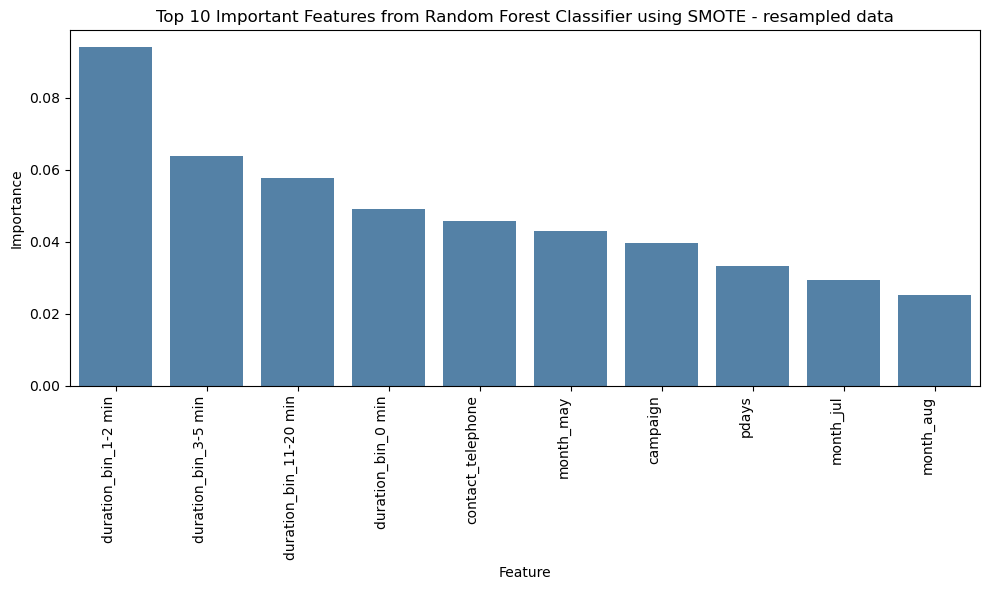

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=rf_smote_features,
    x='Feature',
    y='Importance',
    color='steelblue'
)
plt.title('Top 10 Important Features from Random Forest Classifier using SMOTE - resampled data')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()

#### RF with ADASYN balanced data

In [37]:
# Train Random Forest on ADASYN data
rf_adasyn = RandomForestClassifier(random_state=42)
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Feature importances
rf_adasyn_features = pd.DataFrame({
    'Feature': X_train_adasyn.columns,
    'Importance': rf_adasyn.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

print("Top 10 Features from ADASYN-resampled data:")
print(rf_adasyn_features)

Top 10 Features from ADASYN-resampled data:
                   Feature  Importance
9     duration_bin_1-2 min    0.100291
12    duration_bin_3-5 min    0.067288
10  duration_bin_11-20 min    0.056848
8       duration_bin_0 min    0.055449
44       contact_telephone    0.046115
50               month_may    0.042063
0                 campaign    0.040853
47               month_jul    0.033715
46               month_aug    0.025643
13   duration_bin_6-10 min    0.024893


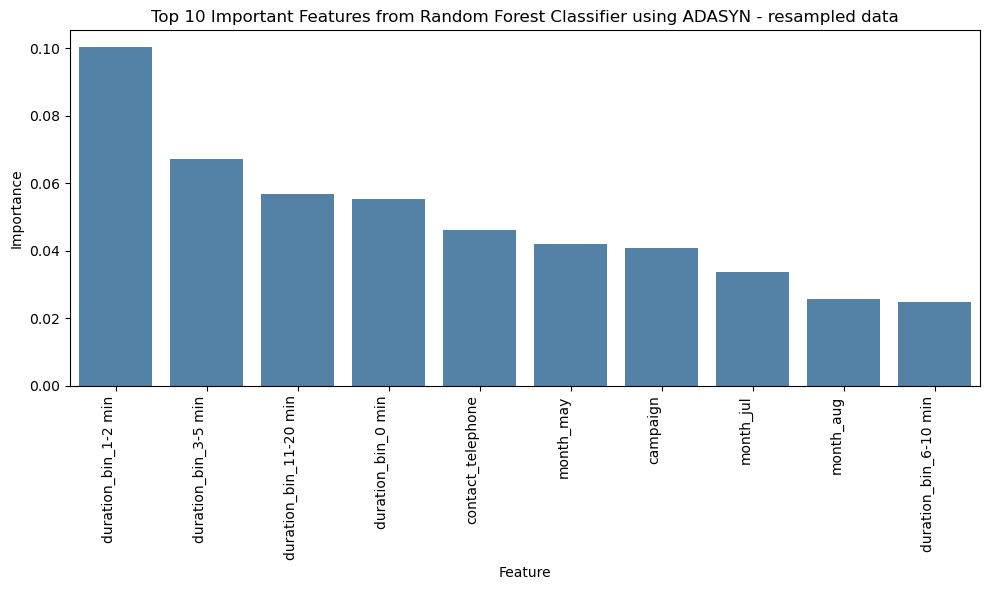

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=rf_adasyn_features,
    x='Feature',
    y='Importance',
    color='steelblue'
)
plt.title('Top 10 Important Features from Random Forest Classifier using ADASYN - resampled data')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()

### Extracting Important Features Using Lasso Regression

#### Lasso with SMOTE balanced data

In [39]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Scale features
scaler_smote = StandardScaler()
X_smote_scaled = scaler_smote.fit_transform(X_train_smote)

# Fit Lasso
lasso_smote = Lasso(alpha=0.01, random_state=42)
lasso_smote.fit(X_smote_scaled, y_train_smote)

# Extract top features
lasso_smote_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_smote.coef_
})
lasso_smote_features = lasso_smote_features[lasso_smote_features['Coefficient'] != 0]
lasso_smote_features = lasso_smote_features.sort_values(by='Coefficient', key=abs, ascending=False).head(10)

print("Top 10 Lasso Features (SMOTE):")
print(lasso_smote_features)


Top 10 Lasso Features (SMOTE):
                  Feature  Coefficient
9    duration_bin_1-2 min    -0.171796
12   duration_bin_3-5 min    -0.171309
8      duration_bin_0 min    -0.116948
50              month_may    -0.109201
47              month_jul    -0.094380
46              month_aug    -0.081744
13  duration_bin_6-10 min    -0.074302
51              month_nov    -0.069750
44      contact_telephone    -0.064290
55        day_of_week_mon    -0.056450


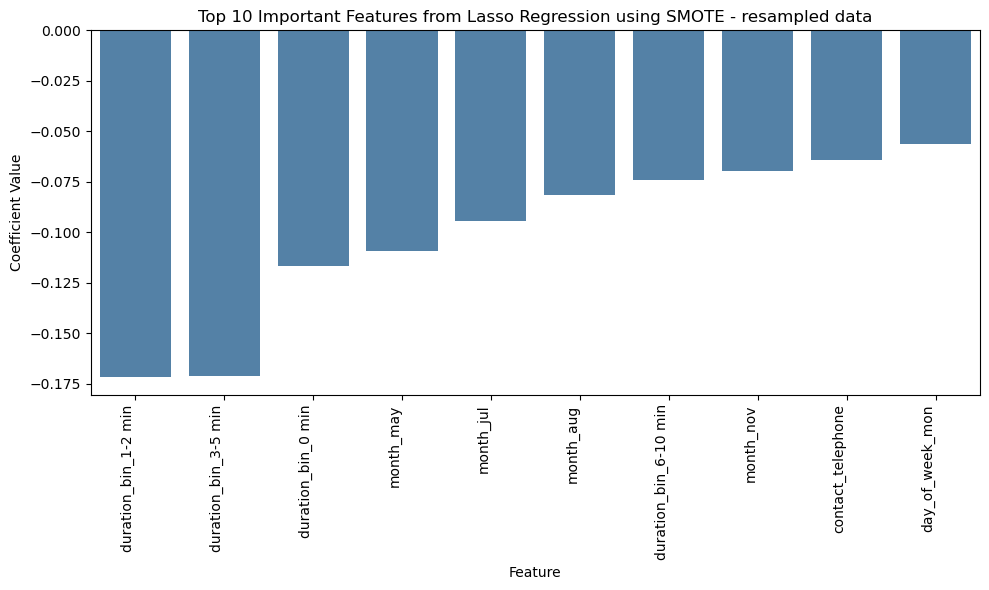

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=lasso_smote_features,
    x='Feature',
    y='Coefficient',
    color='steelblue'
)
plt.title('Top 10 Important Features from Lasso Regression using SMOTE - resampled data')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()

#### Lasso with ADAYSN balanced data

In [41]:
# Scale features
scaler_adasyn = StandardScaler()
X_adasyn_scaled = scaler_adasyn.fit_transform(X_train_adasyn)

# Fit Lasso
lasso_adasyn = Lasso(alpha=0.01, random_state=42)
lasso_adasyn.fit(X_adasyn_scaled, y_train_adasyn)

# Extract top features
lasso_adasyn_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_adasyn.coef_
})
lasso_adasyn_features = lasso_adasyn_features[lasso_adasyn_features['Coefficient'] != 0]
lasso_adasyn_features = lasso_adasyn_features.sort_values(by='Coefficient', key=abs, ascending=False).head(10)

print("Top 10 Lasso Features (ADASYN):")
print(lasso_adasyn_features)


Top 10 Lasso Features (ADASYN):
                  Feature  Coefficient
12   duration_bin_3-5 min    -0.186107
9    duration_bin_1-2 min    -0.181722
8      duration_bin_0 min    -0.124443
50              month_may    -0.113100
47              month_jul    -0.098357
46              month_aug    -0.086043
13  duration_bin_6-10 min    -0.084233
51              month_nov    -0.072266
55        day_of_week_mon    -0.064180
44      contact_telephone    -0.063218


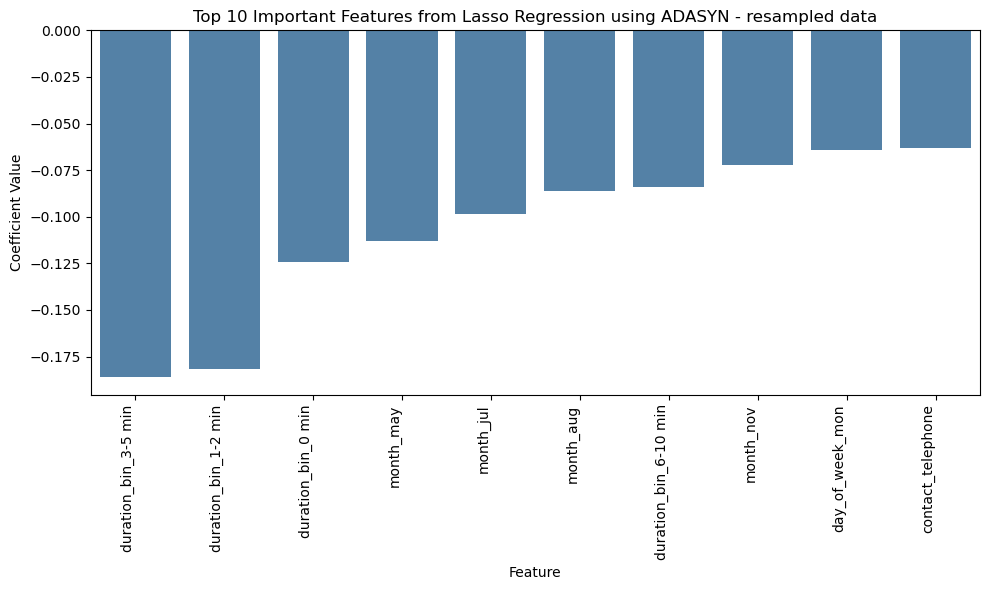

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=lasso_adasyn_features,
    x='Feature',
    y='Coefficient',
    color='steelblue'
)
plt.title('Top 10 Important Features from Lasso Regression using ADASYN - resampled data')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()

#### 

### Models Training Across Different Scenarios

#### Scenario 1: RF with LASSO Features from SMOTE Data

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,  accuracy_score, precision_score, recall_score, roc_auc_score
import numpy as np

# Use only Lasso-selected features
selected_features = lasso_smote_features['Feature'].tolist()
X_train_selected = X_train_smote[selected_features]
X_test_selected = X_test[selected_features]

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train_smote)

# Make predictions
y_pred = rf.predict(X_test_selected)
y_prob = rf.predict_proba(X_test_selected)[:, 1]

# Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = recall_score(y_test, y_pred)  # TP / (TP + FN)
specificity = tn / (tn + fp)               # TN / (TN + FP)
precision = precision_score(y_test, y_pred)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Print results
print("Scenario 1 Results:")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"G-Mean:      {gmean:.4f}")
print(f"Accuracy:    {accuracy:.4f}")
print(f"AUC:         {auc:.4f}")

Scenario 1 Results:
Sensitivity: 0.6760
Specificity: 0.8771
Precision:   0.4106
G-Mean:      0.7700
Accuracy:    0.8545
AUC:         0.8752


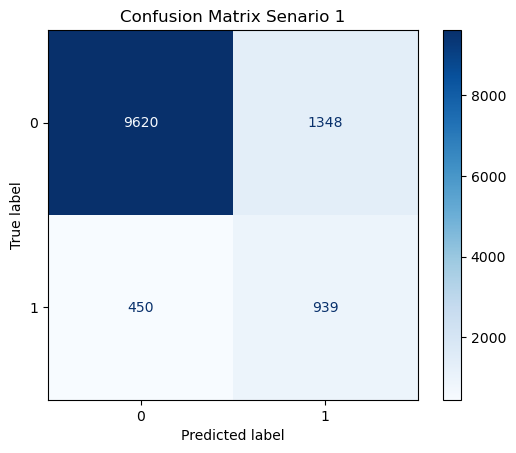

In [44]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Senario 1')
plt.show()

#### Scenario 2: RF with LASSO Features from ADASYN Data

In [45]:

# Use only Lasso-selected features
selected_features = lasso_adasyn_features['Feature'].tolist()
X_train_selected = X_train_adasyn[selected_features]
X_test_selected = X_test[selected_features]

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train_adasyn)

# Make predictions
y_pred = rf.predict(X_test_selected)
y_prob = rf.predict_proba(X_test_selected)[:, 1]

# Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = recall_score(y_test, y_pred)  # TP / (TP + FN)
specificity = tn / (tn + fp)               # TN / (TN + FP)
precision = precision_score(y_test, y_pred)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Print results
print("Scenario 2 Results:")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"G-Mean:      {gmean:.4f}")
print(f"Accuracy:    {accuracy:.4f}")
print(f"AUC:         {auc:.4f}")


Scenario 2 Results:
Sensitivity: 0.7135
Specificity: 0.8565
Precision:   0.3864
G-Mean:      0.7817
Accuracy:    0.8404
AUC:         0.8750


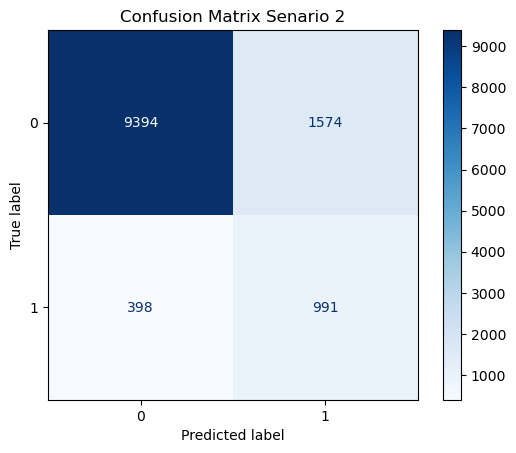

In [46]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Senario 2')
plt.show()

#### Scenario 3: RF with RF Features from SMOTE Data

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Use top 10 features from Random Forest feature importance
selected_rf_features = rf_smote_features['Feature'].tolist()
X_train_selected = X_train_smote[selected_rf_features]
X_test_selected = X_test[selected_rf_features]

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train_smote)

# Make predictions
y_pred = rf.predict(X_test_selected)
y_prob = rf.predict_proba(X_test_selected)[:, 1]

# Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Print results
print("Scenario 3 Results:")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"G-Mean:      {gmean:.4f}")
print(f"Accuracy:    {accuracy:.4f}")
print(f"AUC:         {auc:.4f}")


Scenario 3 Results:
Sensitivity: 0.8265
Specificity: 0.7571
Precision:   0.3012
G-Mean:      0.7910
Accuracy:    0.7649
AUC:         0.8702


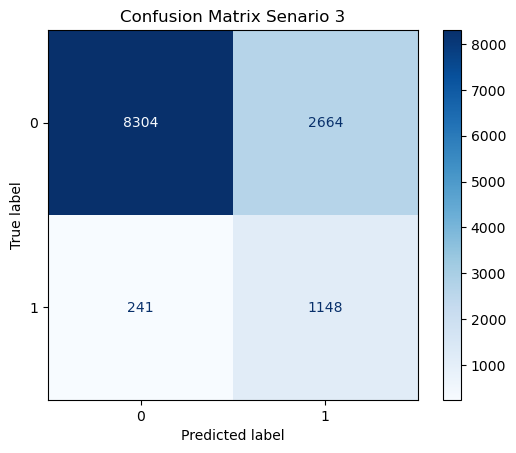

In [48]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Senario 3')
plt.show()

#### Scenario 4: RF with RF Features from ADASYN Data

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Use top 10 features from Random Forest
selected_rf_features = rf_adasyn_features['Feature'].tolist()
X_train_selected = X_train_adasyn[selected_rf_features]
X_test_selected = X_test[selected_rf_features]

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train_adasyn)

# Make predictions
y_pred = rf.predict(X_test_selected)
y_prob = rf.predict_proba(X_test_selected)[:, 1]

# Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Print results
print("Scenario 4 Results:")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"G-Mean:      {gmean:.4f}")
print(f"Accuracy:    {accuracy:.4f}")
print(f"AUC:         {auc:.4f}")


Scenario 4 Results:
Sensitivity: 0.7279
Specificity: 0.8196
Precision:   0.3381
G-Mean:      0.7724
Accuracy:    0.8093
AUC:         0.8608


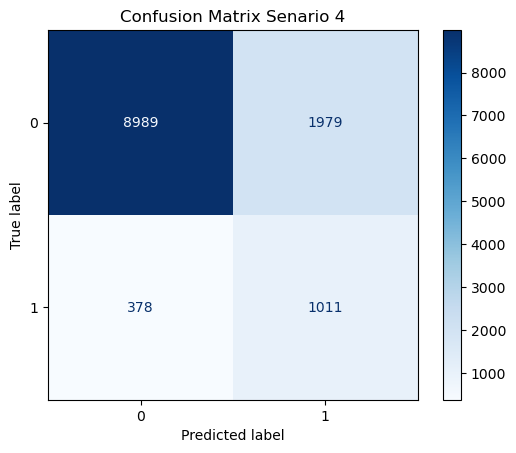

In [50]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Senario 4')
plt.show()

#### Scenario 5: Logistic Regression with LASSO Features from SMOTE Data

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Use top 10 features from Lasso
selected_features = lasso_smote_features['Feature'].tolist()
X_train_selected = X_train_smote[selected_features]
X_test_selected = X_test[selected_features]

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_selected, y_train_smote)

# Make predictions
y_pred = lr.predict(X_test_selected)
y_prob = lr.predict_proba(X_test_selected)[:, 1]

# Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Print results
print("Scenario 5 Results:")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"G-Mean:      {gmean:.4f}")
print(f"Accuracy:    {accuracy:.4f}")
print(f"AUC:         {auc:.4f}")


Scenario 5 Results:
Sensitivity: 0.6782
Specificity: 0.8665
Precision:   0.3915
G-Mean:      0.7666
Accuracy:    0.8454
AUC:         0.8665


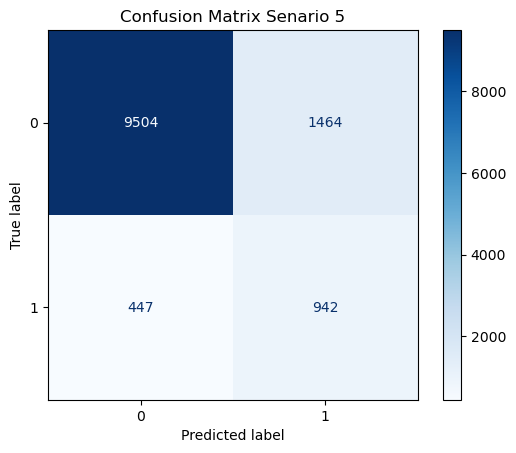

In [52]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Senario 5')
plt.show()

#### Scenario 6: Logistic Regression with LASSO Features from ADASYN Data

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import numpy as np

# Use only top 10 Lasso-selected features
selected_features = lasso_adasyn_features['Feature'].tolist()
X_train_selected = X_train_adasyn[selected_features]
X_test_selected = X_test[selected_features]

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_selected, y_train_adasyn)

# Make predictions
y_pred = log_reg.predict(X_test_selected)
y_prob = log_reg.predict_proba(X_test_selected)[:, 1]

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Print results
print("Scenario 6 Results:")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"G-Mean:      {gmean:.4f}")
print(f"Accuracy:    {accuracy:.4f}")
print(f"AUC:         {auc:.4f}")


Scenario 6 Results:
Sensitivity: 0.6429
Specificity: 0.8808
Precision:   0.4059
G-Mean:      0.7525
Accuracy:    0.8541
AUC:         0.8666


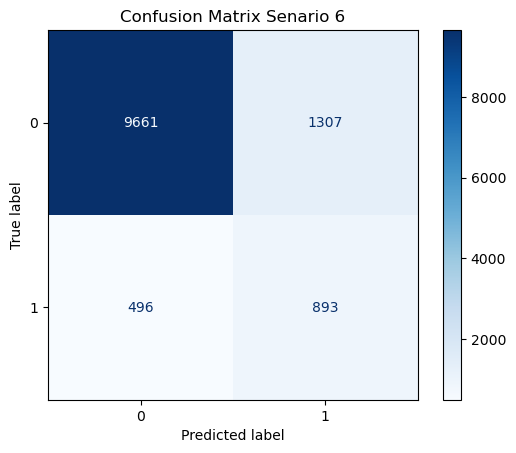

In [54]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Senario 6')
plt.show()

#### Scenario 7: Logistic Regression with RF Features from SMOTE Data

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import numpy as np

# Use only top 10 RF-selected features
rf_selected_features = rf_smote_features['Feature'].tolist()
X_train_selected = X_train_smote[rf_selected_features]
X_test_selected = X_test[rf_selected_features]

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1500, random_state=42)
log_reg.fit(X_train_selected, y_train_smote)

# Make predictions
y_pred = log_reg.predict(X_test_selected)
y_prob = log_reg.predict_proba(X_test_selected)[:, 1]

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Step 5: Print results
print("Scenario 7 Results:")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"G-Mean:      {gmean:.4f}")
print(f"Accuracy:    {accuracy:.4f}")
print(f"AUC:         {auc:.4f}")

Scenario 7 Results:
Sensitivity: 0.8373
Specificity: 0.7589
Precision:   0.3055
G-Mean:      0.7972
Accuracy:    0.7677
AUC:         0.8744


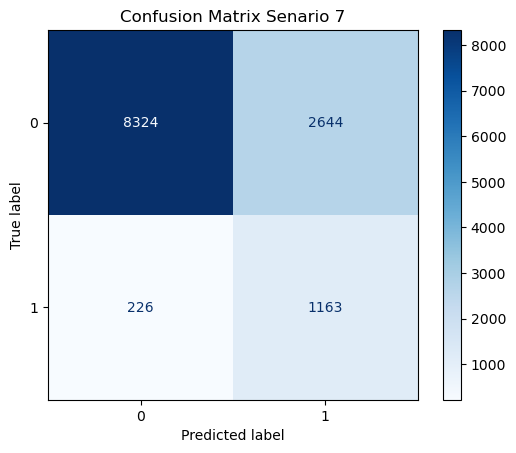

In [56]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Senario 7')
plt.show()

#### Scenario 8: Logistic Regression with RF Features from ADASYN Data

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np

# Use only RF-selected top 10 features
selected_rf_features = rf_adasyn_features['Feature'].tolist()
X_train_selected = X_train_adasyn[selected_rf_features]
X_test_selected = X_test[selected_rf_features]

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1500, random_state=42)
model.fit(X_train_selected, y_train_adasyn)

# Predict
y_pred = model.predict(X_test_selected)
y_prob = model.predict_proba(X_test_selected)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
auc = roc_auc_score(y_test, y_prob)

# Print the results
print("Scenario 8 Results:")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"G-Mean:      {gmean:.4f}")
print(f"Accuracy:    {accuracy:.4f}")
print(f"AUC:         {auc:.4f}")


Scenario 8 Results:
Sensitivity: 0.7055
Specificity: 0.8300
Precision:   0.3445
G-Mean:      0.7652
Accuracy:    0.8160
AUC:         0.8598


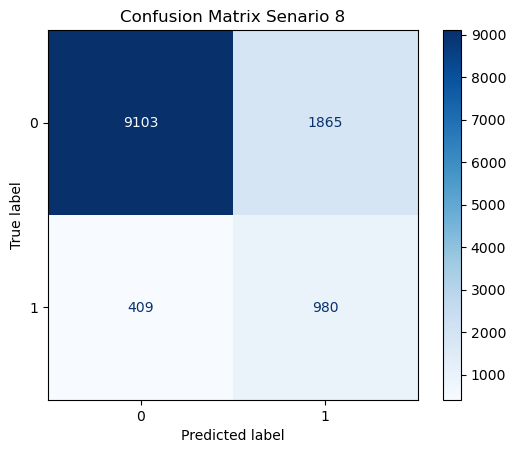

In [58]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Senario 8')
plt.show()

#### Best Senario

- The scenario 7 has the highest sensitivity (0.8373) and G-Mean (0.7972), ensuring most subscribers are correctly identified. Its strong AUC (0.8744) effectively distinguishes classes. SMOTE handles class imbalance, and RF-selected features remove irrelevant variables, achieving high recall and balanced performance, crucial for imbalanced datasets.